In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from dataprep import *

In [13]:
labels_path_1 = "/data/dajiang/smartPixels/dataset_5s/dataset_5s_100x25x150_parquets/unflipped/labels" # 100x25x150
labels_path_2 = "/data/dajiang/smartPixels/dataset_5s/dataset_5s_100x25_parquets/unflipped/labels" # 100x25x100
labels_path_3 = "/data/dajiang/smartPixels/dataset_5s/dataset_5s_50x25_parquets/unflipped/labels" # 50x25x100
labels_path_4 = "/data/dajiang/smartPixels/dataset_5s/dataset_5s_50x20_parquets/unflipped/labels" # 50x20x100
labels_path_5 = "/data/dajiang/smartPixels/dataset_5s/dataset_5s_50x15_parquets/unflipped/labels" # 50x15x100
labels_path_6 = "/data/dajiang/smartPixels/dataset_5s/dataset_5s_50x12P5_parquets/unflipped/labels" # 50x12.5x100
labels_path_7 = "/data/dajiang/smartPixels/dataset_5s/dataset_5s_50x10_parquets/unflipped/labels" # 50x10x100

labels_files_1 = os.listdir(labels_path_1)
labels_parquet_files_1 = [os.path.join(labels_path_1,file) for file in labels_files_1 if file.endswith(".parquet")]
labels_files_2 = os.listdir(labels_path_2)
labels_parquet_files_2 = [os.path.join(labels_path_2,file) for file in labels_files_2 if file.endswith(".parquet")]
labels_files_3 = os.listdir(labels_path_3)
labels_parquet_files_3 = [os.path.join(labels_path_3,file) for file in labels_files_3 if file.endswith(".parquet")]
labels_files_4 = os.listdir(labels_path_4)
labels_parquet_files_4 = [os.path.join(labels_path_4,file) for file in labels_files_4 if file.endswith(".parquet")]
labels_files_5 = os.listdir(labels_path_5)
labels_parquet_files_5 = [os.path.join(labels_path_5,file) for file in labels_files_5 if file.endswith(".parquet")]
labels_files_6 = os.listdir(labels_path_6)
labels_parquet_files_6 = [os.path.join(labels_path_6,file) for file in labels_files_6 if file.endswith(".parquet")]
labels_files_7 = os.listdir(labels_path_7)
labels_parquet_files_7 = [os.path.join(labels_path_7,file) for file in labels_files_7 if file.endswith(".parquet")]

labels_dataframes_1 = [pd.read_parquet(f) for f in labels_parquet_files_1]
labels_df_1 = pd.concat(labels_dataframes_1, ignore_index=True)
labels_dataframes_2 = [pd.read_parquet(f) for f in labels_parquet_files_2]
labels_df_2 = pd.concat(labels_dataframes_2, ignore_index=True)
labels_dataframes_3 = [pd.read_parquet(f) for f in labels_parquet_files_3]
labels_df_3 = pd.concat(labels_dataframes_3, ignore_index=True)
labels_dataframes_4 = [pd.read_parquet(f) for f in labels_parquet_files_4]
labels_df_4 = pd.concat(labels_dataframes_4, ignore_index=True)
labels_dataframes_5 = [pd.read_parquet(f) for f in labels_parquet_files_5]
labels_df_5 = pd.concat(labels_dataframes_5, ignore_index=True)
labels_dataframes_6 = [pd.read_parquet(f) for f in labels_parquet_files_6]
labels_df_6 = pd.concat(labels_dataframes_6, ignore_index=True)
labels_dataframes_7 = [pd.read_parquet(f) for f in labels_parquet_files_7]
labels_df_7 = pd.concat(labels_dataframes_7, ignore_index=True)

In [14]:
labels_df_1

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane
0,612.625061,-48.922787,150.0,-0.757340,0.049044,-0.116782,85617.0,7.90134,-0.126663,6.485075,-0.419962,-17.425638,126.244454
1,201.477859,-53.786057,150.0,-8.064991,0.693847,-2.785046,41448.0,7.67022,2.870180,2.895820,-0.249133,-35.101078,-15.708617
2,-605.248840,21.131144,150.0,2.605942,0.000962,-0.395943,107955.0,-1.22490,-0.395944,-6.581609,-0.002430,21.313367,-111.628167
3,-266.079193,23.036179,150.0,13.625046,-0.347436,-4.459844,37649.0,-2.22143,4.473360,-3.055050,0.077903,17.193441,-36.950450
4,295.017487,8.322075,150.0,-18.961287,0.983385,-4.578484,46264.0,6.56093,4.682900,4.141390,-0.214784,24.430873,-15.586749
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976628,169.402313,-40.749577,150.0,-1.147717,0.252065,-1.708395,11276.0,4.12040,-1.726890,0.671810,-0.147545,-29.683708,119.016556
1976629,283.301849,8.153676,150.0,-6.144318,-0.202812,-2.173910,32040.0,-3.03721,-2.183350,2.826390,0.093294,1.156652,71.322581
1976630,390.316681,-10.071828,150.0,-17.895615,0.111265,-2.680549,92909.0,1.05363,-2.682850,6.676101,-0.041508,-6.958706,-110.390870
1976631,-67.293129,46.653690,150.0,1.015080,-0.586624,-3.417757,11785.0,-5.30398,-3.467730,-0.297002,0.171640,33.780686,-45.017994


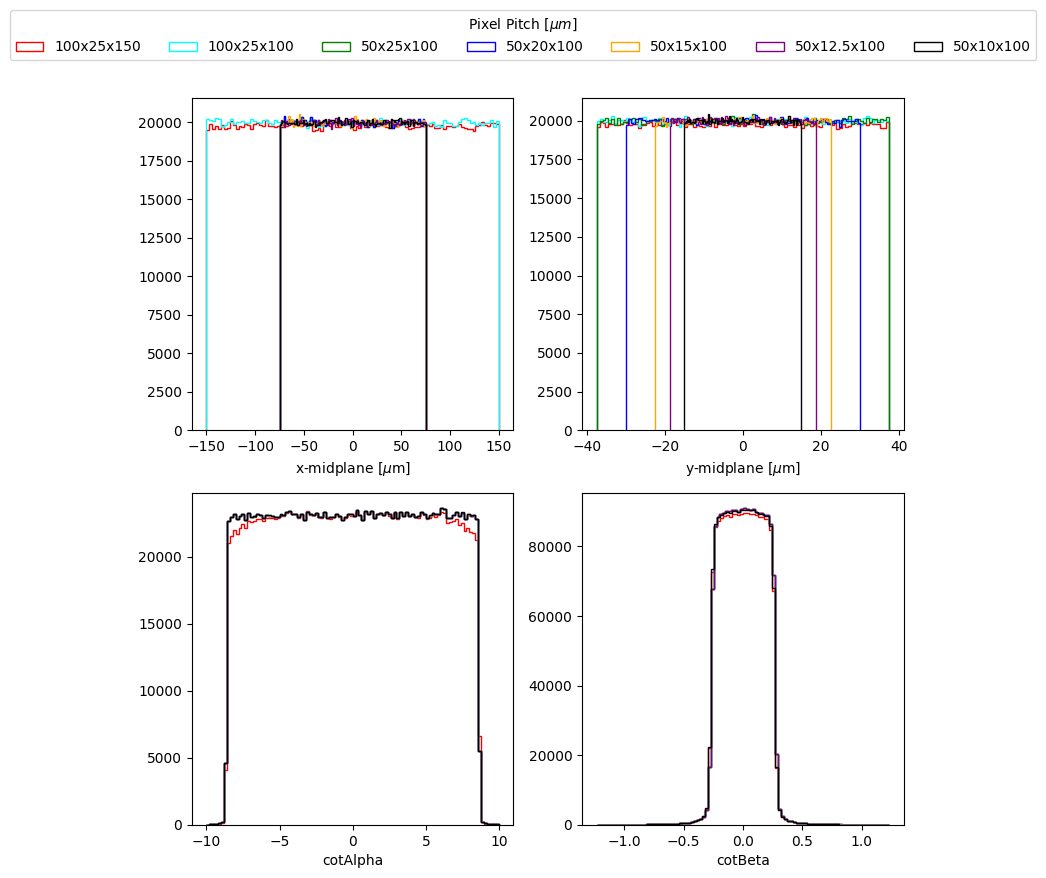

In [15]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

ax[0,0].hist(labels_df_1['x-midplane'],bins=100,histtype='step',label='100x25x150', color='red')
ax[0,0].hist(labels_df_2['x-midplane'],bins=100,histtype='step',label='100x25x100', color='cyan')
ax[0,0].hist(labels_df_3['x-midplane'],bins=100,histtype='step',label='50x25x100', color='green')
ax[0,0].hist(labels_df_3['x-midplane'],bins=100,histtype='step',label='50x20x100', color='blue')
ax[0,0].hist(labels_df_4['x-midplane'],bins=100,histtype='step',label='50x15x100', color='orange')
ax[0,0].hist(labels_df_5['x-midplane'],bins=100,histtype='step',label='50x12.5x100', color='purple')
ax[0,0].hist(labels_df_6['x-midplane'],bins=100,histtype='step',label='50x10x100', color='black')
ax[0,0].set_xlabel('x-midplane [$\mu$m]')

ax[0,1].hist(labels_df_1['y-midplane'],bins=100,histtype='step', color='red')
ax[0,1].hist(labels_df_2['y-midplane'],bins=100,histtype='step', color='cyan')
ax[0,1].hist(labels_df_3['y-midplane'],bins=100,histtype='step', color='green')
ax[0,1].hist(labels_df_4['y-midplane'],bins=100,histtype='step', color='blue')
ax[0,1].hist(labels_df_5['y-midplane'],bins=100,histtype='step', color='orange')
ax[0,1].hist(labels_df_6['y-midplane'],bins=100,histtype='step', color='purple')
ax[0,1].hist(labels_df_7['y-midplane'],bins=100,histtype='step', color='black')
ax[0,1].set_xlabel('y-midplane [$\mu$m]')

ax[1,0].hist(labels_df_1['cotAlpha'],bins=100,histtype='step', color='red')
ax[1,0].hist(labels_df_2['cotAlpha'],bins=100,histtype='step', color='cyan')
ax[1,0].hist(labels_df_3['cotAlpha'],bins=100,histtype='step', color='green')
ax[1,0].hist(labels_df_4['cotAlpha'],bins=100,histtype='step', color='blue')
ax[1,0].hist(labels_df_5['cotAlpha'],bins=100,histtype='step', color='orange')
ax[1,0].hist(labels_df_6['cotAlpha'],bins=100,histtype='step', color='purple')
ax[1,0].hist(labels_df_7['cotAlpha'],bins=100,histtype='step', color='black')
ax[1,0].set_xlabel('cotAlpha')

ax[1,1].hist(labels_df_1['cotBeta'],bins=100,histtype='step', color='red')
ax[1,1].hist(labels_df_2['cotBeta'],bins=100,histtype='step', color='cyan')
ax[1,1].hist(labels_df_3['cotBeta'],bins=100,histtype='step', color='green')
ax[1,1].hist(labels_df_4['cotBeta'],bins=100,histtype='step', color='blue')
ax[1,1].hist(labels_df_5['cotBeta'],bins=100,histtype='step', color='orange')
ax[1,1].hist(labels_df_6['cotBeta'],bins=100,histtype='step', color='purple')
ax[1,1].hist(labels_df_7['cotBeta'],bins=100,histtype='step', color='black')
ax[1,1].set_xlabel('cotBeta')

fig.legend(title='Pixel Pitch [$\mu m$]', loc='upper center', ncol=7, bbox_to_anchor=(0.5, 1.1))
plt.tight_layout()
#fig.savefig('plots/labels_all.png', dpi=300)
fig.show()

In [16]:
print(max(labels_df_1['cotBeta']), min(labels_df_1['cotBeta'])) # 100x25x150
print(max(labels_df_2['cotBeta']), min(labels_df_2['cotBeta'])) # 50x25x100
print(max(labels_df_3['cotBeta']), min(labels_df_3['cotBeta'])) # 50x20x100
print(max(labels_df_4['cotBeta']), min(labels_df_4['cotBeta'])) # 50x15x100
print(max(labels_df_5['cotBeta']), min(labels_df_5['cotBeta'])) # 50x12.5x100
print(max(labels_df_6['cotBeta']), min(labels_df_6['cotBeta'])) # 50x10x100


1.2292608558511198 -1.2254431699687176
1.2292608558511198 -1.231565056743204
1.2292608558511198 -1.231565056743204
1.2292608558511198 -1.231565056743204
1.2292608558511198 -1.231565056743204
1.2292608558511198 -1.231565056743204


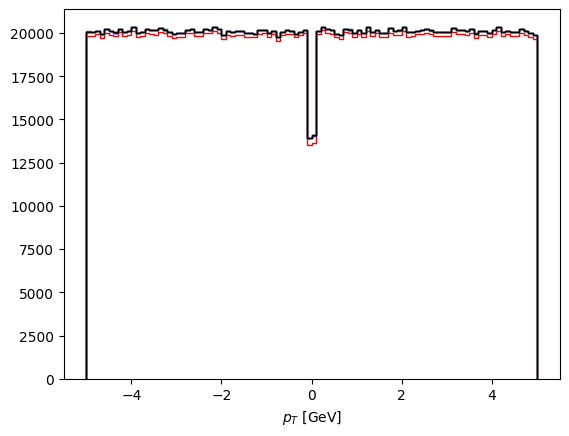

In [17]:
fig, ax = plt.subplots()

ax.hist(labels_df_1['pt'],bins=100,histtype='step',label='100x25x150', color='red')
ax.hist(labels_df_2['pt'],bins=100,histtype='step',label='100x25x100', color='cyan')
ax.hist(labels_df_3['pt'],bins=100,histtype='step',label='50x25x100', color='green')
ax.hist(labels_df_4['pt'],bins=100,histtype='step',label='50x20x100', color='blue')
ax.hist(labels_df_5['pt'],bins=100,histtype='step',label='50x15x100', color='orange')
ax.hist(labels_df_6['pt'],bins=100,histtype='step',label='50x12.5x100', color='purple')
ax.hist(labels_df_7['pt'],bins=100,histtype='step',label='50x10x100', color='black')

ax.set_xlabel('$p_T$ [GeV]')
#ax.legend()
#fig.savefig('plots/pt_all.png', dpi=300)
fig.show()